In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from compute_psycho import relaxation_job
import ghibtools as gh
from params import *
from bibliotheque import df_baseline
from configuration import *

In [2]:
metrics = ['Arousal','Relaxation','Relaxation_intensity','Perceived_duration']
indexes = ['participant','session']

In [3]:
concat = []
for participant in subject_keys:
    concat.append(relaxation_job.get(participant).to_dataframe())
df = pd.concat(concat).reset_index(drop = True)
df = df.drop(columns = ['stim_name'])
df[metrics] = df[metrics].astype(float)

relaxation is processing ('P28',)
relaxation is processing ('P29',)
relaxation is processing ('P30',)
relaxation is processing ('P31',)


In [4]:
df_ratio = df_baseline(df, indexes, metrics)

In [5]:
df

,participant,session,Arousal,Relaxation,Relaxation_intensity,Perceived_duration
0,P01,baseline,11.0,10.0,4.0,96.0
1,P01,music,24.0,66.0,61.0,75.0
2,P01,odor,13.0,67.0,61.0,87.0
3,P02,baseline,7.0,93.0,95.0,62.0
4,P02,music,35.0,89.0,91.0,59.0
...,...,...,...,...,...,...
88,P30,music,86.0,56.0,78.0,55.0
89,P30,odor,36.0,93.0,87.0,59.0
90,P31,baseline,22.0,75.0,67.0,12.0
91,P31,music,83.0,65.0,67.0,22.0


In [6]:
df_ratio

,participant,session,Arousal,Relaxation,Relaxation_intensity,Perceived_duration
0,P01,odor,1.181818,6.700000,15.250000,0.906250
1,P02,odor,9.142857,0.698925,0.863158,0.500000
2,P03,odor,1.909091,1.151515,1.107692,14.666667
3,P04,odor,2.041667,1.265625,0.957746,1.000000
4,P05,odor,8.500000,0.926316,0.896907,0.767677
...,...,...,...,...,...,...
57,P27,music,0.075000,1.032609,1.021505,1.031746
58,P28,music,1.016949,1.041096,1.150000,0.637681
59,P29,music,2.600000,1.016949,1.044776,0.367816
60,P30,music,21.500000,0.777778,1.418182,0.982143


/home/valentin.ghibaudo/.virtualenvs/py3.10_nodegpu/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/valentin.ghibaudo/.virtualenvs/py3.10_nodegpu/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/valentin.ghibaudo/.virtualenvs/py3.10_nodegpu/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/valentin.ghibaudo/.virtualenvs/py3.10_nodegpu/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarn

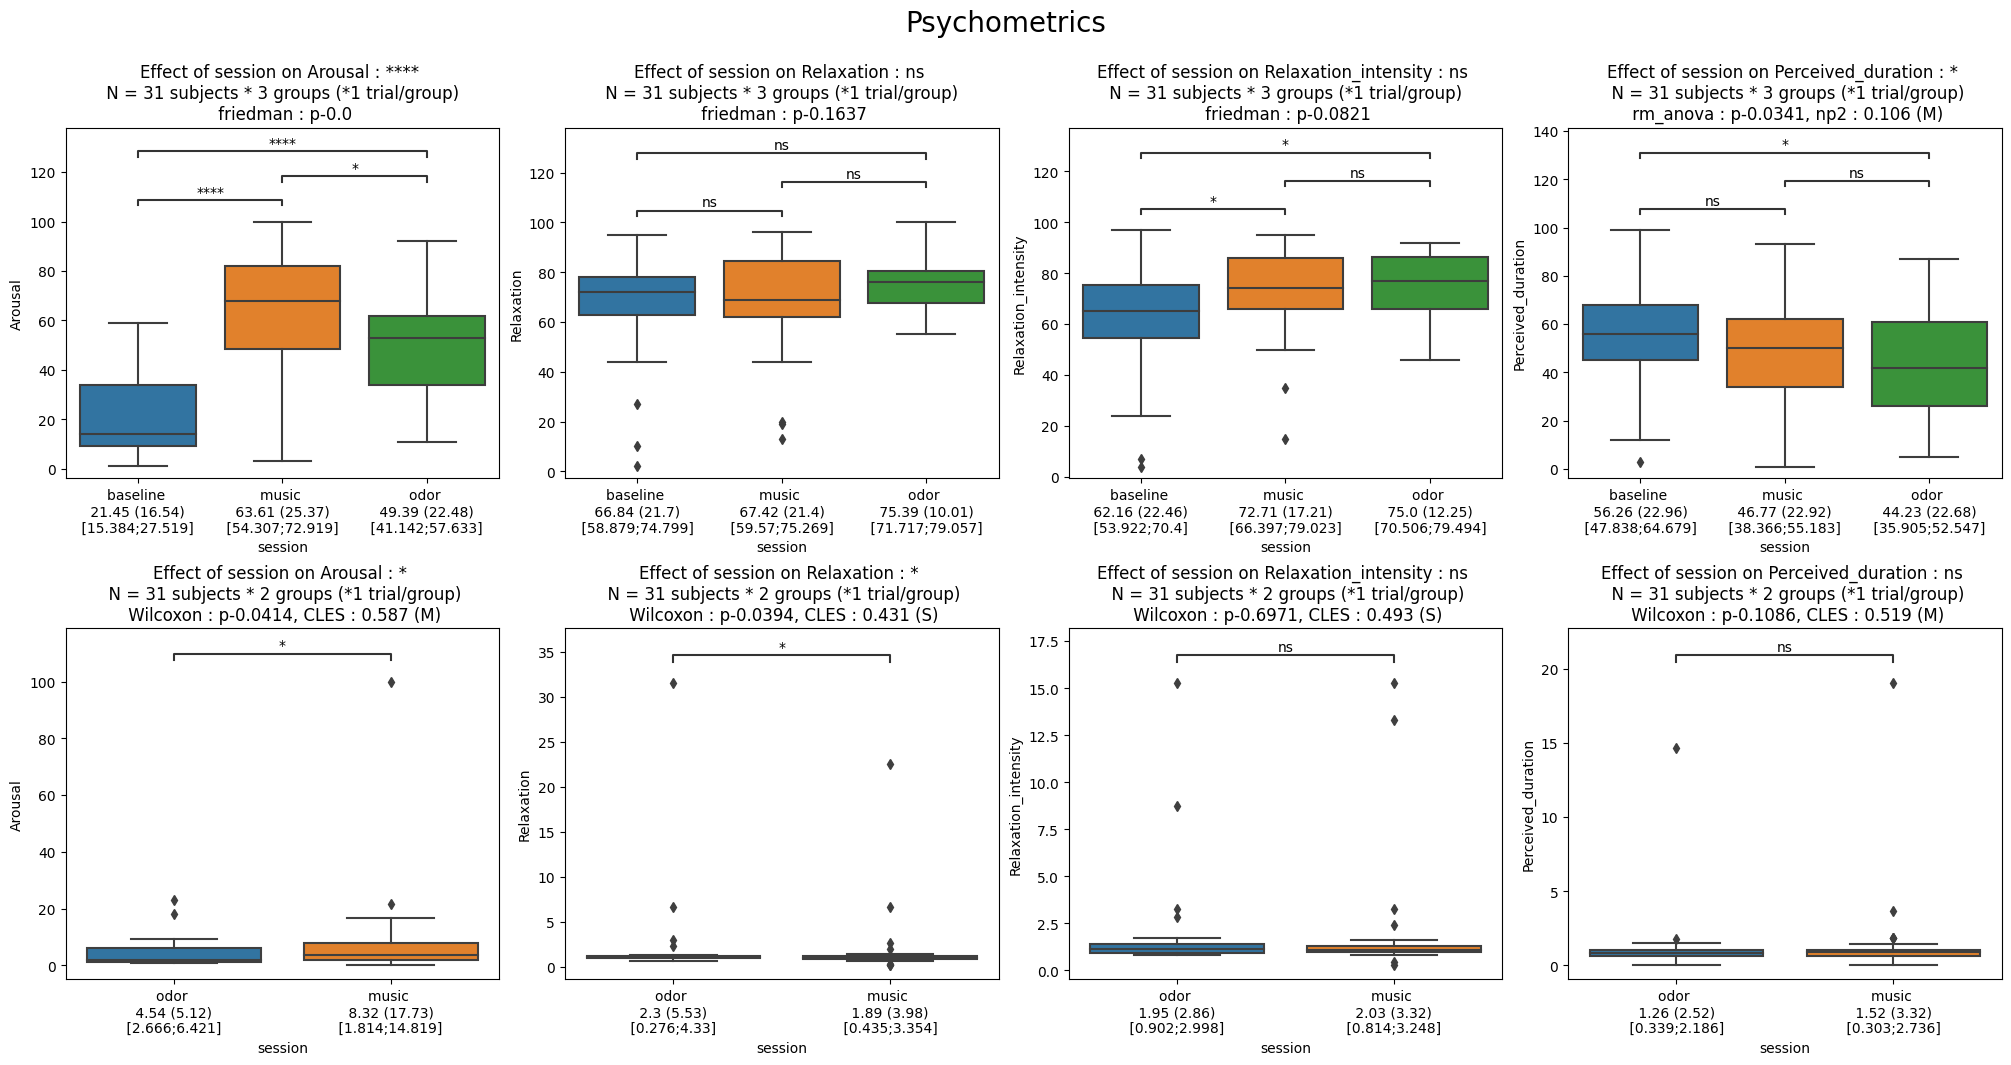

In [7]:
nrows = 2
ncols = 4

fig , axs = plt.subplots(nrows = nrows, ncols = ncols, figsize = (20,10), constrained_layout = True)
fig.suptitle('Psychometrics', y = 1.05 , fontsize = 20)

for i, col in enumerate(metrics):
    ax = axs[0,i]
    gh.auto_stats(df = df, predictor = 'session', outcome = col, design = 'within', subject = 'participant', ax=ax)
    
    ax = axs[1,i]
    gh.auto_stats(df = df_ratio, predictor = 'session', outcome = col, design = 'within', subject = 'participant', ax=ax)
 
fig.savefig(base_folder / 'Figures' / 'Psycho' / 'psycho.png', bbox_inches = 'tight')

/tmp/ipykernel_1582926/632242239.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr('spearman'), annot = True, cmap = 'seismic' , vmin = - 1, vmax = 1)


<AxesSubplot: >

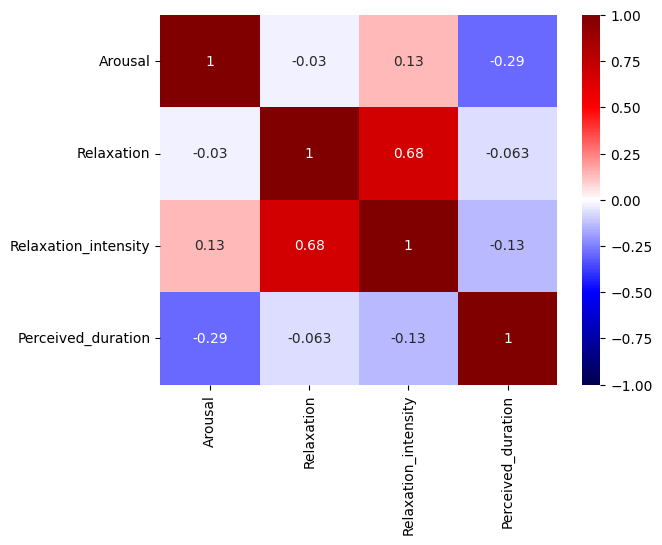

In [8]:
sns.heatmap(df.corr('spearman'), annot = True, cmap = 'seismic' , vmin = - 1, vmax = 1)

/tmp/ipykernel_1582926/799660024.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df[df['session'] == ses].corr('spearman'), annot = True, cmap = 'seismic' , vmin = - 1, vmax = 1, ax=ax)


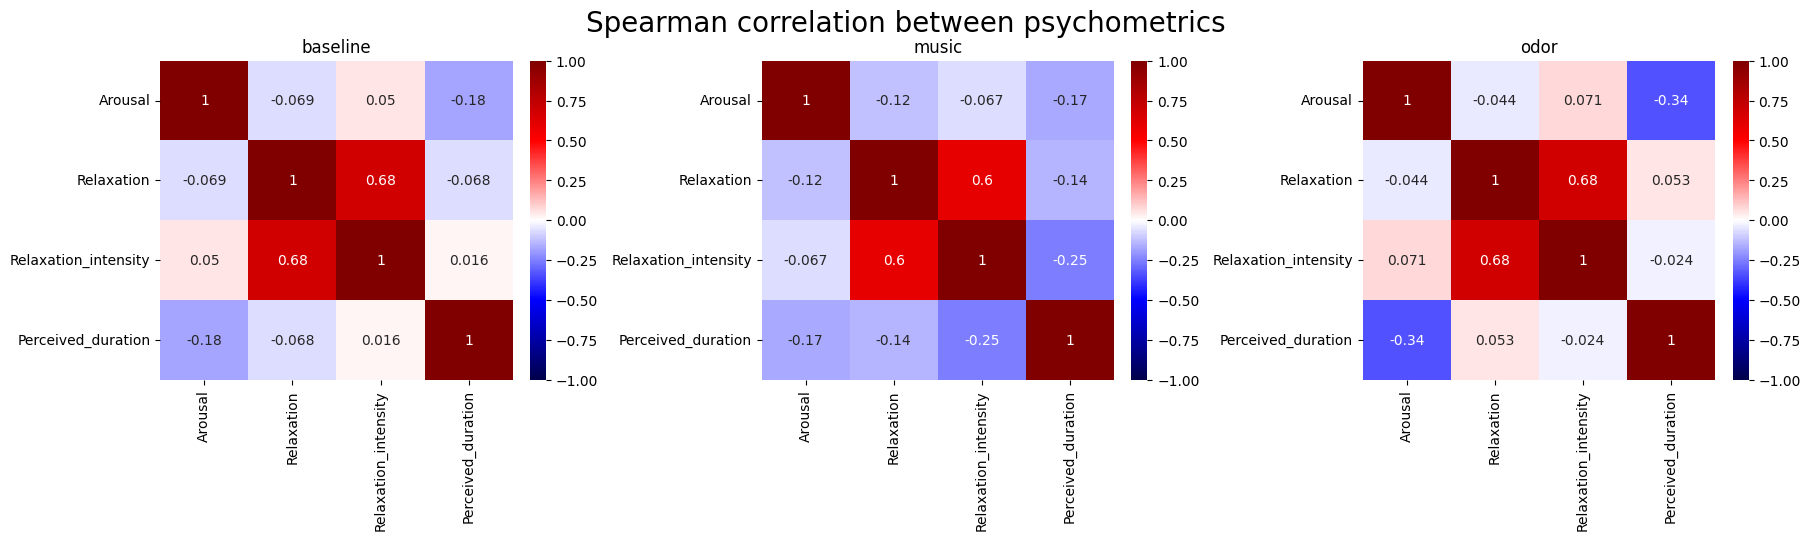

In [9]:
ncols = len(session_keys)

fig, axs = plt.subplots(ncols = ncols, figsize = (18,5), constrained_layout = True)
fig.suptitle('Spearman correlation between psychometrics', fontsize = 20, y = 1.05)

for c, ses in enumerate(session_keys):
    ax = axs[c]
    sns.heatmap(df[df['session'] == ses].corr('spearman'), annot = True, cmap = 'seismic' , vmin = - 1, vmax = 1, ax=ax)
    ax.set_title(ses)

fig.savefig(base_folder / 'Figures' / 'Psycho' / 'correlation.png', bbox_inches = 'tight')